In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('./dis.dat', sep='\t')



# Inicializar una lista para almacenar las secciones
secciones = []

# Inicializar una lista vacía para almacenar temporalmente las filas de una sección
seccion_temp = []

# Iterar a través de las filas del DataFrame
for index, row in df.iterrows():
    # Si la primera columna de la fila contiene la palabra "endl", significa que comenzamos una nueva sección
    if row.iloc[0] == "endl":
        # Añadir la sección temporal a la lista de secciones
        if len(seccion_temp) > 0:
            secciones.append(seccion_temp)
        # Reiniciar la lista temporal para la nueva sección
        seccion_temp = []
    else:
        # Agregar la fila a la sección temporal
        seccion_temp.append(row)

# Añadir la última sección a la lista de secciones si no está vacía
if len(seccion_temp) > 0:
    secciones.append(seccion_temp)

# Ahora, 'secciones' contendrá una lista de DataFrames, cada uno representando una sección del CSV
for i, seccion in enumerate(secciones):
    print(f"Sección {i + 1}:")
    if len(seccion) > 0:
        seccion_df = pd.DataFrame(seccion)
        print(seccion_df)
    else:
        print("Sección vacía")

Sección 1:
   column  count
0       1  214.0
1       2   64.0
2       3   51.0
3       4  102.0
4       5   77.0
5       6   49.0
6       7   27.0
7       8   11.0
8       9    1.0
9      10    3.0
10     11    0.0
11     12    0.0
12     13    1.0
Sección 2:
   column  count
14      1  226.0
15      2   69.0
16      3   55.0
17      4  100.0
18      5   58.0
19      6   49.0
20      7   28.0
21      8    7.0
22      9    4.0
23     10    3.0
24     11    0.0
25     12    1.0
26     13    0.0
Sección 3:
   column  count
28      1  197.0
29      2   77.0
30      3   55.0
31      4   98.0
32      5   77.0
33      6   60.0
34      7   22.0
35      8   12.0
36      9    1.0
37     10    1.0
38     11    0.0
39     12    0.0
40     13    0.0
Sección 4:
   column  count
42      1  188.0
43      2   76.0
44      3   50.0
45      4  114.0
46      5   85.0
47      6   43.0
48      7   27.0
49      8   11.0
50      9    4.0
51     10    2.0
52     11    0.0
53     12    0.0
54     13    0.0
Secc

2
    column   mean
0        1  401.2
1        2  136.7
2        3  115.6
3        4  211.1
4        5  155.9
5        6   97.8
6        7   48.8
7        8   22.0
8        9    7.6
9       10    2.9
10      11    0.4
11      12    0.1
12      13    0.1


C:\Users\nicho\AppData\Local\Temp\ipykernel_30464\1053674272.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '401.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mean_data['mean'][i] /= 10


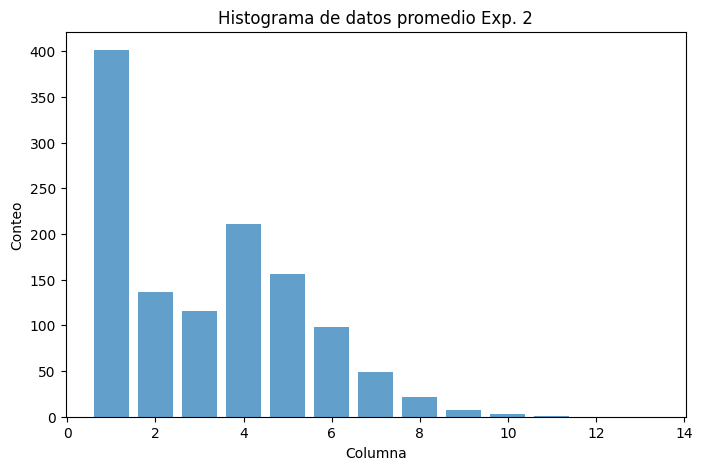

In [6]:
mean_data = pd.DataFrame(columns=['column', 'mean'])
number_of_columns = len(pd.DataFrame(seccion)['column'])

for i in range(number_of_columns):
    mean_data.loc[i] = [i + 1, 0]
mean_data['mean'][1] += 2
print(mean_data['mean'][1])

for i, seccion in enumerate(secciones):
    seccion_df = pd.DataFrame(seccion)
    seccion_df = seccion_df.reset_index(drop=True)

    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(8)

    plt.bar(seccion_df['column'], seccion_df['count'], align='center', alpha=0.7)
    plt.xlabel('Columna')
    plt.ylabel('Conteo')
    plt.title(f'Histograma de datos {i + 1}, Exp. 2')

    nombre_archivo = f'histograma-exp-2_seccion_{i + 1}.png'
    plt.savefig(nombre_archivo)
    plt.close()

    for j in range(number_of_columns):
        mean_data['mean'][j] += seccion_df['count'][j]

for i in range(number_of_columns):
    mean_data['mean'][i] /= 10

print(mean_data)

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(8)

plt.bar(mean_data['column'], mean_data['mean'], align='center', alpha=0.7)
plt.xlabel('Columna')
plt.ylabel('Conteo')
plt.title(f'Histograma de datos promedio Exp. 2')

nombre_archivo = f'histograma_promedio-exp-2.png'
plt.savefig(nombre_archivo)